# Snapchat Political Ads
* **See the main project notebook for instructions to be sure you satisfy the rubric!**
* See Project 03 for information on the dataset.
* A few example prediction questions to pursue are listed below. However, don't limit yourself to them!
    * Predict the reach (number of views) of an ad.
    * Predict how much was spent on an ad.
    * Predict the target group of an ad. (For example, predict the target gender.)
    * Predict the (type of) organization/advertiser behind an ad.

Be careful to justify what information you would know at the "time of prediction" and train your model using only those features.

# Summary of Findings


### Introduction
The problem that I want to predict in the advertisement dataframe are the Impression, or number of views of an individual advertisement. To predict the number of impressions given different features, we must approach this problem with regression. The model that was chosen to investigate the regression problem is through Linear Regression, and the evaluation metric used to assess our model was through R^2 and Root Mean Squared Error. R^2 allows us to measure how close the data is fitted onto the regression line (Accuracy Measure). The higher the R^2, the better the model fits to the data itself. RMSE is important, because it is used to measure the differences between the predicted and observed values. A good model will have similar RMSE for the training and testing dataset, where as an overfitted model is when RMSE of a test set is significantly higher than the RMSE of a training set, and the model will be underfitted, when the RMSE of a training set is significantly higher than RMSE of testing set.
- **Prediction Problem:** Regression Model
- **Target Variable:** Number of Impressions given different features
- **Evaluation Metric:** R^2 and RMSE

### Baseline Model
After cleaning the csv files and merging them into one, we first removed the "ADID", "CreativeUrl" columns, because they will not be useful features for modeling, as they bring no important information for predictions. Also, we removed the "StartDate" and "EndDate" columns, because they will be merged from categorical to numerical data, and will be a new feature added for the final model. We believed that because in the original advertisement dataframe, because there are only two numerical features (Impression, Spend), we wanted to put as many numerical features into the model. Then, we removed "Impressions" (predictor variable), and also "Spend", because it is a numerical data column. Then, we filled all the NaN values of the categorical dataframes to "ALL", meaning that the specific categorical column does not target any audience, meaning that the NaN values are generalized, not targeted.

After, we OneHotEncoded the categorical columns. Before getting into details, we believed that all the categorical columns in the ads dataframe was nominal, in that they did not contain any specific orderings. Although one might argue that "Age" has specific ordering, which it does, cannot account to the current situation, because many ordinal values were grouped and bracketed into more generalized categories. For example, Ages 10 - 18+, etc. Although the professor advised us to not use pd.get_dummies for OneHotEncoding, because we did not use this code in our actual Baseline and Final Models for onehotencoding, we decided to use get_dummies only to determine feature importance for categorical columns. We used get_dummies because it was more convenient and much faster than OneHotEncoder in sklearn. After onehotencoding the categorical columns, we used RandomForestClassifier to find the 10 most important categorical features. We were only able to use n_estimators=10, because increasing it would cause the datahub server to crash. I believe this is the case because we onehotencoded over 20 categorical columns, making rfc difficult. We then found the four columns, "Interests", "CreativeProperties", "Language", and "Segments" as the top four important categorical features. Then, we ran RandomForestClassifier on the four features (ohe), and found that "Interests" and "Segments" were the two categorical features with the highest importance.

We then took "Interests", "Segments", and "Spend" as our features for the linear regression model, and "Impressions" as the value that we would like to predict. Interests and Segments are nominal categorical columns, so they were OneHotEncoded (properly using sklearn), and NaN values were filled with "ALL". Spend is numerical quantitative column, so when creating the ColumnTransformer, it was passthrough as remainder. We then created the linear_regression model and used train_test_split(test_size=0.25) to train the linear regression model. We chose 75% train and 25% test, because we judged that there were enough information in the dataframe to give more more split to the testing set, rather than a 90/10 split. We then calculated the R^2 and RMSE of both the training and testing set 100 times iteratively, and found their averages. The Baseline R^2 Train Set was 0.71538, and the Baseline R^2 Test set was 0.45646. Although the Train Set's accuracy is plausible, the Test set's accuracy is very low and inaccurate. I believe this could be fixed within the final model. The Baseline RMSE for Training set was 2548572, and Testing set was 2920470. Their differences are not very significant, so we can argue that the model did not overfit, or underfit.

- **Number of Features:** "Interests" (Nominal), "Segments" (Nominal), "Spend" (Quantitative) --> 3 Features
- **Model Performance:** Test Set's Accuracy (R^2) is very inaccurate compared to Training set.
- RMSE between test and training set are not significantly different, so model is not overfit/underfit.

### Final Model
The two new features that we added to the Baseline linear regression model were the Duration of Advertisement (in days), and Language the Advertisement was Targeting. We decided to add Duration of Advertisement, because we believed that only having one numerical feature for the linear regression model was not sufficient enough, so we cleaned up the StartDate and EndDate features, and extracted the differences between the two dates in days. We added the Language column as a new feature, because according to the RandomForestClassifier, it is the third most important categorical feature from the dataframe itself. 

We also believed that the features from the Baseline model needed some improvements. We wanted to make sure that the currency in which the advertisements costed were all unified, so we used an imported function to convert all the Spendings column values to USD. After adding the two new features and improving the Spendings feature, we modeled using five features, The categorical (nominal) features were "Interests", "Segments", "Language". The numerical features were "Converted Spend" and "Days Duration". We created a categorical pipeline that imputed NaN values to "ALL", and also OneHotEncoded the categorical values using the sklearn encoder. 

One thing that drastically changed in the Final Model was the usage of the Principal Component Analysis (PCA). This is a really helpful function, because it drops any correlated features that are created when OneHotEncoding the categorical features of the model. The PCA's job is the drop any correlated features occuring due to OHE, and does not touch the quantitative variables. We also used Grid-Search with Cross-Validation to find the parameters for PCA that would determine how much information would be kept in the model. We used GridSearchCV, and used the default 5-fold cross validation, because there was nothing special about the PCA or the model itself. After, we wanted to find the PCA component using the result from Cross Validation, and the possible parameters for the PCA component were 0.90, 0.95, 0.99, or None (All data is kept). We then used train_test_split using the Features (X) and Impressions (y), and found that the best PCA component to use was 0.95.

After this, we used train_test_split(test_size=0.25) to train the linear regression model like we did for the Baseline model. Then, we found the R^2 (Accuracy) and RMSE for the training and testing sets. We decided to fit the model 50 times (which took an enormous amount of time), and found that the R^2 for the testing sets increased dramatically from the R^2 of baseline testing sets. The R^2 of the Final Model training set was 0.71677, which is a very slight increase from the baseline model. However, the R^2 for the test set increased to 0.65297, from the 0.45646 accuracy. The RMSE for the Training set of the Final Model increased slightly, but the RMSE for the testing set drastically decreased from the Baseline model, showing that the two new features and the help of PCA allowed the final model to fit the data and predict values better than the Baseline Model. We decided to use LinearRegression as the regression model, because we believed that this model would best predict the predictor variable ("Impression") than any other regression model. Although training set (RMSE)'s loss comparison might be higher than logistic regression, sin transformation, etc, the LinearRegression model succeeds in generalization, and is a good model when we are using both categorical and numerical features to predict a variable. 

- **Features Added:** "Duration of Advertisement" (Numerical), "Language" (Nominal)
- **Model Type Chosen:** Linear Regression Model 
- **Useful:** PCA, Grid-Search w/ Cross-Validation, RandomForestClassifier

### Fairness Evaluation
Our Linear Regression Model, through baseline and final model, I have predicted the number of impressions for each advertisement. Because we train_test_split (test=25%), roughly 1100 rows from the original advertisement dataframe predicted (testing set). For our model's fairness evaluation, we wanted to check if there were no differences in RMSE between advertisements that had Segment Targeting, and ads that did not. The dataset did not specify which segments, but just states "Provided" if there was Segment Targeting. We filled the NaN values with "ALL", meaning that there were no segment targeting, and the advertisement was for everyone. If our null hypothesis is that there are no differences in RMSE between ads, the alternative hypothesis would be that actually, advertisements that targeted segments had lower RMSE, meaning that the regression model has bias (Expected - True) for advertisements with Segment Targeting.

The test statistic for the permutation test is the difference in RMSE between the predicted and actual "Impression" values assigned by the linear regression model. We found the observed statistic by grouping the "Segment" column into "Provided" and "All", and found the RMSE between the actual and predicted values. We noticed that in the observed statistic, the RMSE of advertisments with Segment targeting was lower, meaning that Segment Targeted advertisements were more likely to be predicted accurately (predicted - actual impressions). The significance level of the permutation test was 0.05, indicating that there is a 5% risk of concluding that a difference of sampled test statistics exists, when there is actually no difference. We ran the permutation test n=1000 times, and received a P-value of 0.432, meaning that we fail to reject that the null hypothesis is wrong. This means that we do not have enough evidence to claim that the null hypothesis is wrong, and can see that the advertisements with Segment targeting/non-targeting advertisements had similar RMSE differences. The permutation test shows us that the model does not have any unfairness on the "Segment" feature.

- **Null Hypothesis:** There are no difference in RMSE between ads that had Segment targeting, and ads that did not.
- **Alternative Hypothesis:** Actually, advertisements that targeted segments had lower RMSE, meaning that the regression model has bias (EV - TV) for advertisements with Segment Targeting.
- **Test Statistic:** Difference in RMSE between Predicted and Actual.
- **Significance Level:** The significance level of 0.05 indicates a 5% risk of concluding that a difference of sampled test statistics exists, when there is actually no difference.
- **P-Value:** 0.432
- **Results:** The P-value was greater than the significance level of 0.05, meaning that the advertisements that targeted segments and ads that did not target segments had similar differences in RMSE between Actual and Predicted values. This means that we fail to reject the null hypothesis that there are no differences in RMSE between segment targeted/non-targeted ads. 

# Code

In [355]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from easymoney.money import EasyPeasy
import time
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from IPython.core.display import display, HTML

### Cleaning and EDA

In [197]:
# get filepath of 2018 dataset from data directory, read as csv
ads_2018_filepath = os.path.join('data', 'PoliticalAds_2018.csv')
ads_2018 = pd.read_csv(ads_2018_filepath)
# convert "StartDate" and "EndDate" to datetime for 2018.
# the "Z" at end of timestamp before convert means UTC (Z).
ads_2018["StartDate"] = pd.to_datetime(ads_2018["StartDate"])
ads_2018["EndDate"] = pd.to_datetime(ads_2018["EndDate"])
# store the first timestamp from "StartDate" for 2018.
first_2018 = ads_2018["StartDate"][0]
# create timestamp with 12/31/2018
last_2018 = first_2018.replace(year=2018, month=12, hour=23, minute=59, second=59)
# fill the NaN values of "EndDate" with last_2018.
ads_2018["EndDate"] = ads_2018["EndDate"].fillna(last_2018)

# get filepath of 2019 dataset from data directory, read as csv
ads_2019_filepath = os.path.join('data', 'PoliticalAds_2019.csv')
ads_2019 = pd.read_csv(ads_2019_filepath)
# convert "StartDate" and "EndDate" to datetime for 2019.
# the "Z" at end of timestamp before convert means UTC (Z).
ads_2019["StartDate"] = pd.to_datetime(ads_2019["StartDate"])
ads_2019["EndDate"] = pd.to_datetime(ads_2019["EndDate"])
# store the first timestamp from "StartDate" for 2019.
first_2019 = ads_2019["StartDate"][0]
# create timestamp with 12/31/2019
last_2019 = first_2019.replace(year=2019, month=12, hour=23, minute=59, second=59)
# fill the NaN values of "EndDate" with last_2019.
ads_2019["EndDate"] = ads_2019["EndDate"].fillna(last_2019)

# concatenate 2018 and 2019 CSV into one dataframe.
stacked = pd.concat([ads_2018, ads_2019], axis=0)
# reset the index of the concatenated dataframe.
stacked_ads = stacked.reset_index(drop=True)


### Baseline Model

In [3]:
# clean dataframe and remove "ADID", "CreativeURL" because they will not be useful features for modeling.
# also remove StartDate and EndDate, as they will be one feature to add for final model.
# remove "Impressions", as it is the column that we would like to predict using the features.
# remove "Spend", because it is a numerical data column.
filtered_cat = stacked_ads.drop(["ADID", "CreativeUrl", "StartDate", "EndDate", "Impressions", "Spend"], axis=1)
# Fill all the NaN values with All (No target interest).
filled_cat = filtered_cat.fillna("ALL")

# all categorical columns will be the features. Use get_dummies to oneHotEncode.
X_cat = pd.get_dummies(filled_cat)
# the predicted value from features will be Impressions.
y = stacked_ads["Impressions"]

In [7]:
# Use randomForestClassifier to determine feature importance for the categorical columns.
# Because all the categorical columns were ohe, n_estimators will be low (not very precise).
# If I were to increase n_estimators, too much iterations will crash code.
rf_10 = RandomForestClassifier(n_estimators=10, class_weight='balanced', n_jobs=-1)
# fit the X (all categorical values) and y ("Impressions") to random forest classifier.
rf_10.fit(X_cat, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

,rf_10_importance
Interests_ALL,0.010994
CreativeProperties_ALL,0.010808
Segments_ALL,0.007432
Segments_Provided by Advertiser,0.007276
Language_ALL,0.006293
AgeBracket_18+,0.005641
Language_en,0.005444
Regions (Included)_ALL,0.004943
AgeBracket_ALL,0.004861
AgeBracket_18-24,0.004476


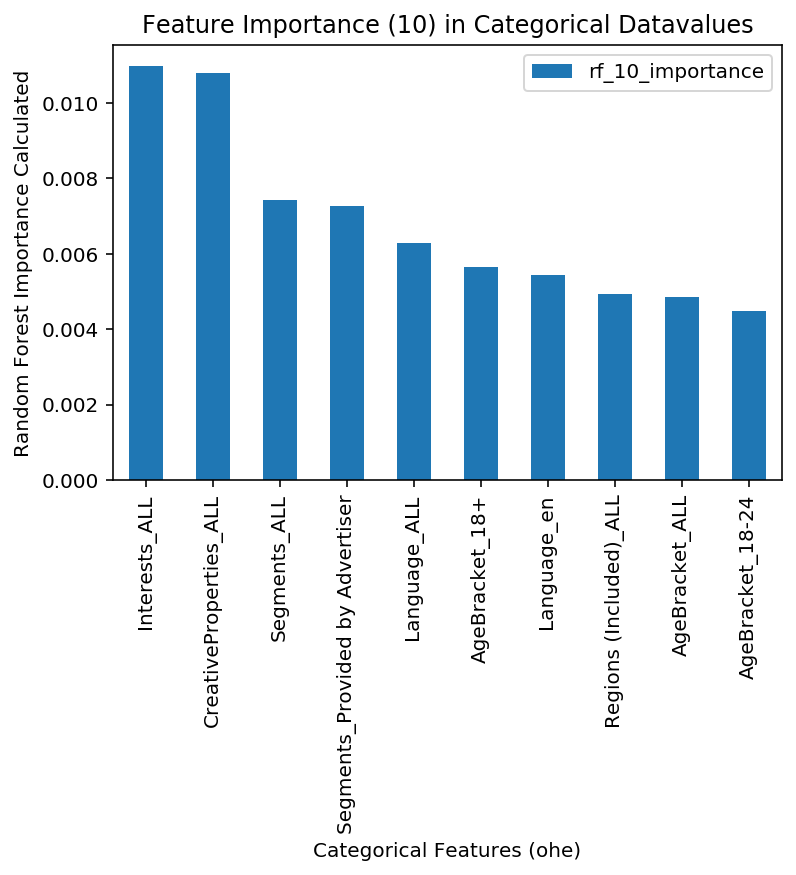

In [8]:
# get the different ohe features, make into dataframe and sort them by rf_importance.
importances_10 = pd.DataFrame(zip(rf_10.feature_importances_),
                           index=X_cat.columns,
                           columns=['rf_10_importance']).sort_values(['rf_10_importance'],ascending=False)

# plot the first 10 most important features, according to RandomForestClassifier.
first_five_10 = importances_10.head(10)
bar_plot_10 = first_five_10.plot(kind='bar')
plt.title("Feature Importance (10) in Categorical Datavalues")
plt.xlabel("Categorical Features (ohe)")
plt.ylabel("Random Forest Importance Calculated")
first_five_10

In [9]:
# Since the highest four categorical columns for RandomTreeClassifiers are
# "Interests", "CreativeProperties", "Language", "Segments", get those four and run RTC.
highest_cata = filled_cat[["Interests", "CreativeProperties", "Language", "Segments"]]
# Use get_dummies to OneHotEncode the categorical columns.
X_highest = pd.get_dummies(highest_cata)
# the predicted value from features will be Impressions. (will be the same as rt_10).
y = stacked_ads["Impressions"]

In [5]:
# Use randomForestClassifier to determine feature importance for the categorical columns.
# Because we are only specifying the 4 columns, increase n_estimators to ~40.
# Any number higher than 40 estimators will crash code, because number of ohe for each four columns too large.
rf_40 = RandomForestClassifier(n_estimators=40, class_weight='balanced', n_jobs=-1)
# fit the X (all categorical values) and y ("Impressions") to random forest classifier.
rf_40.fit(X_highest, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

,rf_40_importance
Interests_ALL,0.013834
Segments_ALL,0.008534
Segments_Provided by Advertiser,0.007868
Language_ALL,0.007366
Language_en,0.005960
CreativeProperties_ALL,0.004952
Interests_Advocates & Activists,0.003844
Interests_Political News Watchers,0.003296
Interests_Soccer Enthusiasts,0.002239
"Interests_TV Network Viewers (CNN),TV Viewers (News),ZZ_Deprecated_1,TV Viewers (Talk Shows)",0.002203


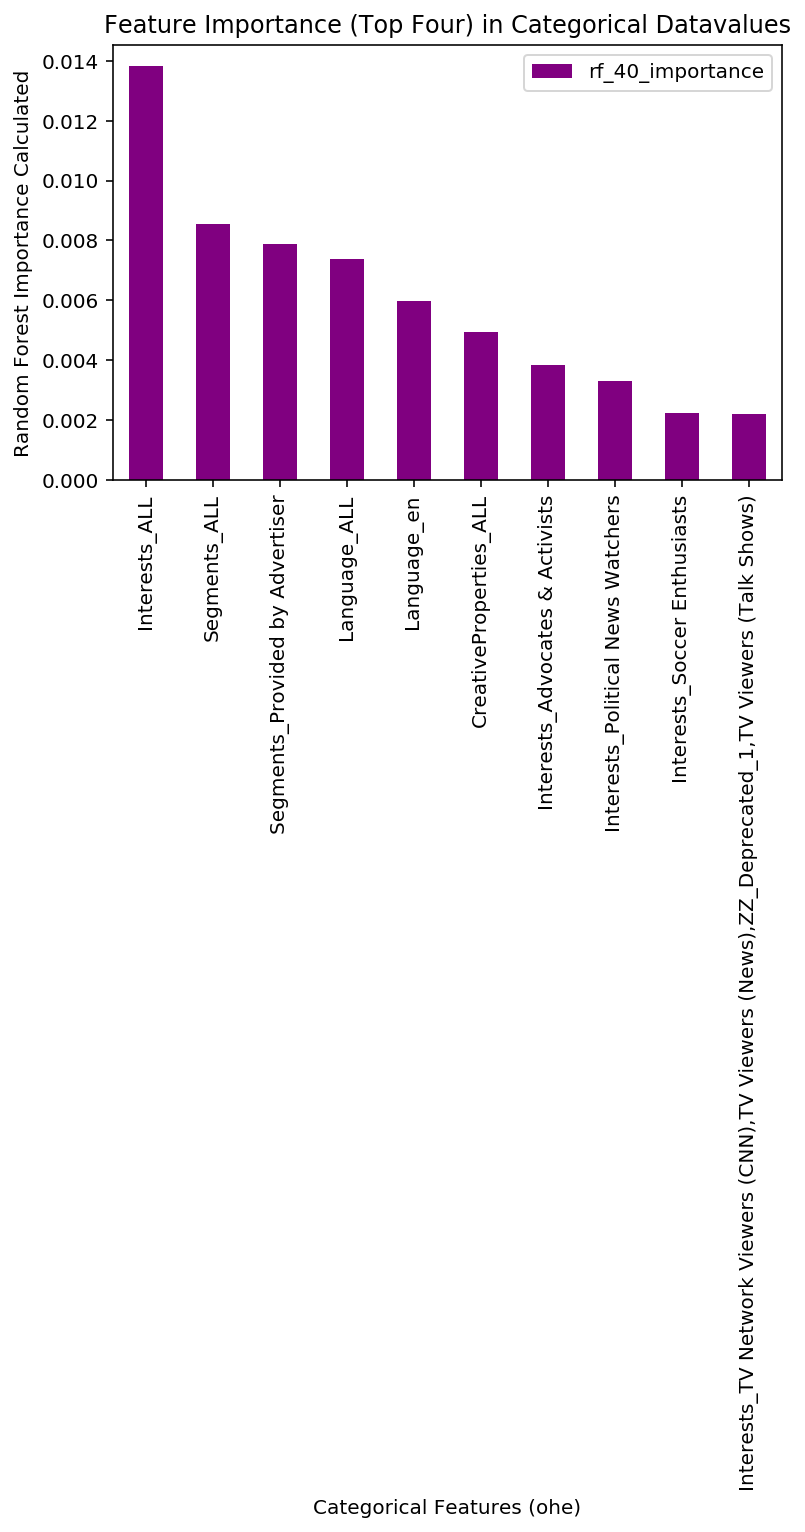

In [14]:
# get the different ohe features, make into dataframe and sort them by rf_importance.
importances_40 = pd.DataFrame(zip(rf_40.feature_importances_),
                           index=X_highest.columns,
                           columns=['rf_40_importance']).sort_values(['rf_40_importance'],ascending=False)

# plot the first 10 most important features, according to RandomForestClassifier.
first_five_40 = importances_40.head(10)
bar_plot_40 = first_five_40.plot(kind='bar', color="purple")
plt.title("Feature Importance (Top Four) in Categorical Datavalues")
plt.xlabel("Categorical Features (ohe)")
plt.ylabel("Random Forest Importance Calculated")
first_five_40

In [11]:
# We can see that out of the four categorical columns, Interests and Segments had the highest 
# feature importance, so they will be the two features for baseline model.

In [185]:
# clean dataframe and remove "ADID", "CreativeURL" because they will not be useful features for modeling.
# also remove StartDate and EndDate, as they will be one feature to add for final model.
# remove "Impressions", as it is the column that we would like to predict using the features.
removed = stacked_ads.drop(["ADID", "CreativeUrl", "StartDate", "EndDate", "Impressions"], axis=1)
# ads dataframe originally contains two columns of quantitative data, "Spend" and "Impressions".
# we have decided that the rest of the columns are nominal data, where order doesn't specifically matter.
# store Spend, Interests, and Segments as the features to train our model.
# Interests and Segments were categorical features with highest feature importance, and Spend is the only 
# other quantitative feature aside from Impressions, our predictor variable.
categorical_columns = ["Interests", "Segments"]
numerical_columns = ["Spend"]

# use pipeline to fill categorical NaN values as "All" (All = No specific target).
# then, use onehotencoder to encode categorical columns.
categorical_pl = Pipeline([
                    ("impute", SimpleImputer(strategy="constant", fill_value="ALL")),
                    ("ohe", OneHotEncoder(handle_unknown="ignore"))])

# use ColumnTransformer to initialize the categorical and numerical columns.
column_transformer = ColumnTransformer([
                        ("categorical", categorical_pl, categorical_columns)], remainder="passthrough")

# create a linear regression pipeline model using column_transformer.
lr_model = Pipeline([("features", column_transformer), ("linear_regression", LinearRegression())])

In [198]:
# The X (Feature) columns will be "AgeBracket", "Interests", "Spend".
X = stacked_ads[["Segments", "Interests", "Spend"]]
# The value wanted to predict is "Impressions."
y = stacked_ads["Impressions"]

# because train_test_split can drastically change the R^2/RMSE of the model,
# iterate 100 times, and get the average of the R^2/RMSE value.
r2_score_train = []
r2_score_test = []
rmse_score_train = []
rmse_score_test = []
# iterate train_test_split 100 times.
for _ in range(100):
    # use train_test_split (train = 0.75, test = 0.25) to train model.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    # fit the training set to model.
    lr_model.fit(X_train, y_train)
    # store the predict of X_test and X_train
    predict_training = lr_model.predict(X_train)
    predict_testing = lr_model.predict(X_test)
    # calculate RMSE for train and test set.
    rmse_score_test.append(np.sqrt(np.mean((predict_testing - y_test) ** 2)))
    rmse_score_train.append(np.sqrt(np.mean((predict_training - y_train) ** 2)))
    # get R^2 of test/train set, which tells us how close the predicted values are fitted to the regression line.
    r2_score_test.append(lr_model.score(X_test, y_test))
    r2_score_train.append(lr_model.score(X_train, y_train))
    # negative R^2 = model worst fitted than linear. 
    
# add the R^2 scores that was iterated 100 times, find its average.
r2_test_avg = np.mean(np.array(r2_score_test))
r2_train_avg = np.mean(np.array(r2_score_train))
print ("Baseline R^2 Train Set: ", r2_train_avg)
print ("Baseline R^2 Test Set: ", r2_test_avg)
print ()
# add the RMSE scores that were iterated 100 times, find its average.
rmse_test_avg = np.mean(np.array(rmse_score_test))
rmse_train_avg = np.mean(np.array(rmse_score_train))
print ("Baseline RMSE Train Set: ", rmse_train_avg)
print ("Baseline RMSE Test Set: ", rmse_test_avg)


Baseline R^2 Train Set:  0.7180116134256308
Baseline R^2 Test Set:  0.4403105196595569

Baseline RMSE Train Set:  2477771.354766903
Baseline RMSE Test Set:  3165854.846174771


### Final Model

In [216]:
# Two features that will be added to improve baseline model:
# Duration of Advertisements (Days) - Numeric Column
# Language the Advertisement was Targeting - Nominal Categorical Column
#----------------------------------------------------------------------#
# store "StartDate" and "EndDate" columns into a separate dataframe.
timestamp_df = stacked_ads[["StartDate", "EndDate"]]
# subtract the EndDate and StartDate to get duration that ads existed for.
timestamp_df["Duration"] = timestamp_df["EndDate"] - timestamp_df["StartDate"]
# use lambda to extract only the days from "Duration column"
timestamp_df["Days Duration"] = timestamp_df["Duration"].map(lambda x: x.days)
# replace the 0 days with 1 day, because the advertisement ran for atleast 1 day.
timestamp_df["Days Duration"] = timestamp_df["Days Duration"].replace(0, 1)


# Features that need improvements:
# Spend should be changed so that the currency is all unified to USD.
ep_func = EasyPeasy()
# store dataframe from stacked_ads with "Currency Code" and "Spend" columns.
currency_df = stacked_ads[["Currency Code", "Spend"]]
# use currency_converted to convert all spendings to USD.
currency_df["Converted Spend"] = currency_df.apply(lambda x: ep_func.currency_converter(x["Spend"], from_currency=x["Currency Code"], to_currency="USD"), axis=1)


In [292]:
# Model using "Days Duration", "Converted Spend", "Language", "Segments", "Interests" features.
# Interests, Segments, and Language were categorical features with highest feature importance.
# Days Duration and Converted Spend are the only numerical features to model from.
final_categorical_columns = ["Interests", "Segments", "Language"]
final_numerical_columns = ["Converted Spend", "Days Duration"]

# use pipeline to fill categorical NaN values as "All" (All = No specific target).
# then, use onehotencoder to encode categorical columns.
final_categorical_pl = Pipeline([
                    ("impute", SimpleImputer(strategy="constant", fill_value="ALL")),
                    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse=False)),
                    ('pca', PCA(svd_solver='full', n_components=0.95))])

# use ColumnTransformer to initialize the categorical and numerical columns.
final_column_transformer = ColumnTransformer([
                        ("categorical", final_categorical_pl, final_categorical_columns)], remainder="passthrough")

# create a linear regression pipeline model using column_transformer.
final_lr_model = Pipeline([("features", final_column_transformer), ("linear_regression", LinearRegression())])

In [293]:
# Make sure that "Converted Spend" and "Days Duration" are inside stacked_ads
stacked_ads["Converted Spend"] = currency_df["Converted Spend"]
stacked_ads["Days Duration"] = timestamp_df["Days Duration"]
# round the floats of Converted Spend to from float to next largest integer.
stacked_ads["Converted Spend"] = stacked_ads[["Converted Spend"]].applymap(np.int64)

In [311]:
# The X (Feature) columns will be Days Duration", "Converted Spend", "Language", "Segments", "Interests"
X = stacked_ads[["Days Duration", "Converted Spend", "Language", "Segments", "Interests"]]
# The value wanted to predict is "Impressions."
y = stacked_ads["Impressions"]

# use train_test_split (train = 0.75, test = 0.25) to train model.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# fit the training set to model.
final_lr_model.fit(X_train, y_train)
# store the predict of X_test and X_train
final_predict_training = final_lr_model.predict(X_train)
final_predict_testing = final_lr_model.predict(X_test)
# calculate RMSE for train and test set.
test_rmse = np.sqrt(np.mean((final_predict_testing - y_test) ** 2))
train_rmse = np.sqrt(np.mean((final_predict_training - y_train) ** 2))
# get R^2 of test/train set, which tells us how close the predicted values are fitted to the regression line.
test_r2 = final_lr_model.score(X_test, y_test)
train_r2 = final_lr_model.score(X_train, y_train)

# Print R^2 and RMSE.
print ("Final Model R^2 Train Set: ", train_r2)
print ("Final Model R^2 Test Set: ", test_r2)
print ()
print ("Final Model RMSE Train Set: ", train_rmse)
print ("Final Model RMSE Test Set: ", test_rmse)

Final Model R^2 Train Set:  0.7167711653325207
Final Model R^2 Test Set:  0.6529703671189064

Final Model RMSE Train Set:  2977833.8890426024
Final Model RMSE Test Set:  1145628.3697359022


In [289]:
# features__categorical__pca__n_components
# Use Grid-Search with Cross Validation and analyze the result.
params = {"features__categorical__pca__n_components":[0.90, 0.95, 0.99, None]}
grids = GridSearchCV(final_lr_model, param_grid=params, cv=5)

In [290]:
# The X (Feature) columns will be Days Duration", "Converted Spend", "Language", "Segments", "Interests"
X = stacked_ads[["Days Duration", "Converted Spend", "Language", "Segments", "Interests"]]
# The value wanted to predict is "Impressions."
y = stacked_ads["Impressions"]

# fit X and y columns to GridSearchCv.
X_train, X_test, y_train, y_test = train_test_split(X, y)
grids.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('features',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('impute',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                          

In [291]:
# best_params tells us that pca of 0.95 (Keeps 95% of the information.)
grids.best_params_

{'features__categorical__pca__n_components': 0.95}

In [294]:
# stores the test set R^2 for regression model.
final_r2 = []
# iterate 50 times.
for _ in range(50):
    # use train_test_split (train = 0.75, test = 0.25) to train model.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    final_lr_model.fit(X_train, y_train)
    # append the R^2 scores to final_r2 list.
    final_r2.append(final_lr_model.score(X_test, y_test))

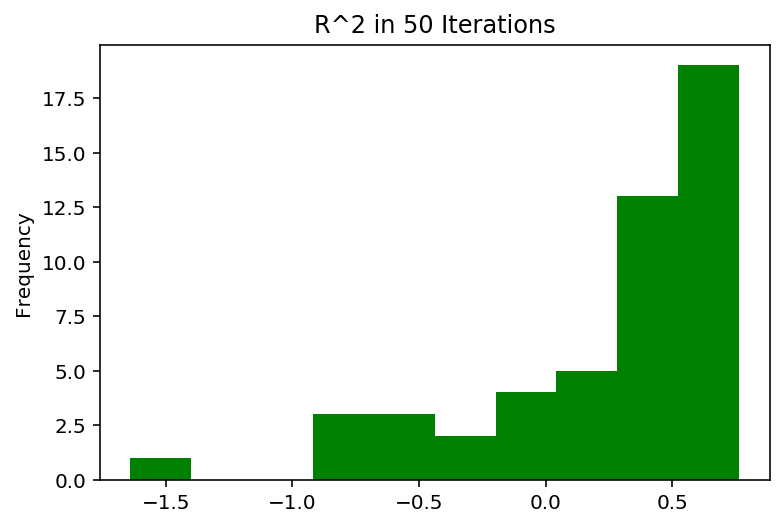

In [307]:
# plot histogram with final_r2 scores.
score_hist = pd.Series(final_r2).plot(kind="hist", title="R^2 in 50 Iterations", color="green")


### Fairness Evaluation

In [362]:
# Our model has predicted the number of impressions for each advertisement.
# Assign the predicted values from test set (~1000 due to test_split).
# Also assign the actual values from test set.
model_df = X_test.assign(Predicted = final_predict_testing).assign(Actual = y_test).reset_index(drop=True)
# view scientific notation to normal format.
pd.options.display.float_format = '{:.4f}'.format
# fill model_df's NaN values with "ALL", like in above modeling.
# ALL = no specific targeting of audience in Language, Segments, Interests
filled_df = model_df.fillna("ALL")

# We will see if the root mean squared error (RMSE) are equal
# for ads that provided targeting Segments, and ads that did not ("ALL").
# Create Helper function that will calculate RMSE.
def rmse_calculate(df):
    # calculate rmse.
    rmse = np.sqrt(mean_squared_error(df["Actual"], df["Predicted"]))
    # return series containing RMSE.
    return pd.Series(rmse)

# Use helper function to store df containg RMSE of "ALL" and "Provided"
# Like we said above, there is no difference in RMSE for targeted & non-targeted ads.
rmse_df = filled_df.groupby("Segments").apply(rmse_calculate).reset_index()
rmse_named = rmse_df.rename(columns={0:"RMSE"})
display(rmse_named)
display(filled_df[["Segments", "Predicted", "Actual"]].groupby("Segments").count())

,Segments,RMSE
0,ALL,1149098.9914
1,Provided by Advertiser,1144118.3573


,Predicted,Actual
Segments,,
ALL,323,323
Provided by Advertiser,744,744


In [378]:
# Calculate the observed statistic (Difference in RMSE) between the two segments.
observed_stat = rmse_named["RMSE"].diff().iloc[-1]
print("Observed Statistic (Difference in RMSE): ", observed_stat)

Observed Statistic (Difference in RMSE):  -4980.634080130374


In [439]:
# Null Hypothesis: There are no difference in RMSE between ads that had Segment targeting, and ads that did not.
# Alternative Hypothesis: Actually, advertisements that targeted segments had lower RMSE, meaning that 
#                         the regression model has bias (EV - TV) for advertisements with Segment Targeting.
# Test Statistic = Difference in RMSE between predicted and Actual.
# Significance Level = The significance level of 0.05 indicates a 5% risk of concluding that a 
#                      difference of sampled test statistics exists, when there is actually no difference
# P-Value = 0.432

In [411]:
# will store difference in RMSE.
diff_list = []
# iterate the permutation test 1000 times.
for _ in range(1000):
    p_test = (
     filled_df[["Segments", "Predicted", "Actual"]]
    .assign(Segments=filled_df.Segments.sample(frac=1.0, replace=False).reset_index(drop=True))
    .groupby("Segments")
    .apply(rmse_calculate)
    .reset_index()
    .set_index("Segments")
    .diff()
    .iloc[-1][0]
    )
    # append p_test to diff_list
    diff_list.append(p_test)

p-value:  0.432


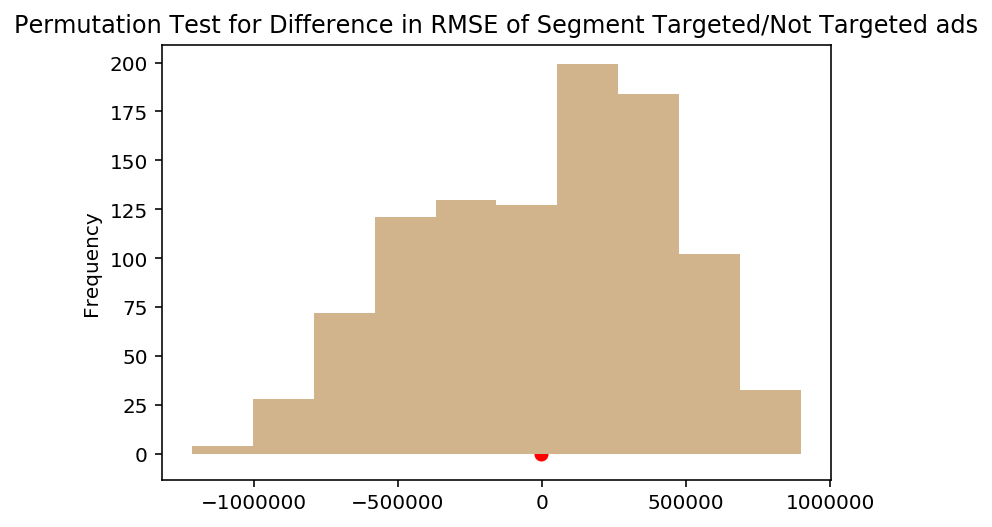

In [438]:
print("p-value: ", pd.Series(observed_stat >= diff_list).mean())
pd.Series(diff_list).plot(kind='hist', color = "tan", title='Permutation Test for Difference in RMSE of Segment Targeted/Not Targeted ads')
plt.scatter(observed_stat, 0, c='r');
